In [95]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

data = pd.read_csv("data_RNA_Seq_v2_expression_median.txt",sep="\t",index_col=1)
meta_patients = pd.read_csv("luad_tcga_clinical_data.tsv",sep="\t",header=0,index_col=2)

meta_patients=meta_patients.drop("Study ID",axis=1)
print(data.shape)
print(meta_patients)


(20531, 518)
                   Patient ID  Diagnosis Age  \
Sample ID                                      
TCGA-05-4244-01  TCGA-05-4244           70.0   
TCGA-05-4249-01  TCGA-05-4249           67.0   
TCGA-05-4250-01  TCGA-05-4250           79.0   
TCGA-05-4382-01  TCGA-05-4382           68.0   
TCGA-05-4384-01  TCGA-05-4384           66.0   
...                       ...            ...   
TCGA-NJ-A55O-01  TCGA-NJ-A55O           56.0   
TCGA-NJ-A55R-01  TCGA-NJ-A55R           67.0   
TCGA-NJ-A7XG-01  TCGA-NJ-A7XG           49.0   
TCGA-O1-A52J-01  TCGA-O1-A52J           74.0   
TCGA-S2-AA1A-01  TCGA-S2-AA1A           68.0   

                 Neoplasm Disease Stage American Joint Committee on Cancer Code  \
Sample ID                                                                         
TCGA-05-4244-01                                                NaN                
TCGA-05-4249-01                                                NaN                
TCGA-05-4250-01               

In [89]:
print(data.isnull().sum().sum())
print(meta_patients.isnull().sum().sum())


2
25514


In [90]:
sel_index=data.apply(lambda x: (x==0).all(), axis = 0)
sel_index.index[sel_index]

Index([], dtype='object')

In [96]:
data_scaled = preprocessing.scale(data.iloc[:,1:])

data_scaled = pd.DataFrame(data_scaled, index =data.index , columns = data.columns[1:])
print(data_scaled.shape)
data_scaled.describe()



(20531, 517)


,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,TCGA-05-4396-01,TCGA-05-4397-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
count,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,...,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04
mean,-3.115773e-16,-1.279371e-16,-1.180710e-16,1.760426e-16,1.639365e-16,-5.013876e-17,-1.044819e-16,-5.187187e-18,2.994468e-16,-9.816857e-17,...,-5.840000e-16,-1.414641e-16,3.188910e-16,-1.227702e-16,-4.443650e-17,4.291036e-16,-8.778067e-17,2.858563e-17,-1.056851e-16,1.914812e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.379758e-01,-2.842081e-01,-2.626203e-01,-2.374016e-01,-2.168511e-01,-2.403818e-01,-2.170053e-01,-2.190499e-01,-1.699081e-01,-3.270922e-01,...,-1.642516e-01,-2.230331e-01,-2.491517e-01,-1.646211e-01,-3.036185e-01,-1.810726e-01,-2.682129e-01,-1.131176e-01,-1.543711e-01,-1.410340e-01
25%,-2.362731e-01,-2.821306e-01,-2.611826e-01,-2.352066e-01,-2.151068e-01,-2.388122e-01,-2.161395e-01,-2.184867e-01,-1.689584e-01,-3.247188e-01,...,-1.632408e-01,-2.215395e-01,-2.475431e-01,-1.631929e-01,-2.990303e-01,-1.798631e-01,-2.636506e-01,-1.126076e-01,-1.533358e-01,-1.395579e-01
50%,-1.869794e-01,-2.222808e-01,-2.078085e-01,-1.808513e-01,-1.668470e-01,-1.877570e-01,-1.747213e-01,-1.897625e-01,-1.376212e-01,-2.500801e-01,...,-1.320914e-01,-1.759019e-01,-1.948448e-01,-1.271216e-01,-2.086346e-01,-1.419273e-01,-1.970830e-01,-9.333137e-02,-1.241266e-01,-1.070846e-01
75%,-3.194700e-02,-2.393561e-02,-3.748754e-02,-2.688335e-02,-1.683461e-02,-2.903397e-02,-3.358210e-02,-6.470214e-02,-2.610938e-02,-3.993109e-03,...,-3.097049e-02,-2.123178e-02,-3.330729e-02,-1.620096e-02,1.097588e-02,-2.443665e-02,-1.227663e-02,-2.203986e-02,-2.549846e-02,-2.101192e-02
max,6.888929e+01,4.859775e+01,4.731961e+01,5.039623e+01,9.873500e+01,8.431307e+01,6.340503e+01,7.342163e+01,8.200304e+01,3.874696e+01,...,8.471857e+01,9.757246e+01,5.011805e+01,1.165459e+02,5.436600e+01,8.561694e+01,6.685034e+01,1.094149e+02,1.104419e+02,1.093210e+02


Sex
Female    277
Male      240
dtype: int64


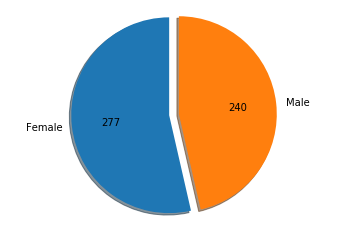

In [112]:
import matplotlib.pyplot as plt
meta_patients.loc[:,"Sex"]=meta_patients.loc[:,"Sex"].map({'MALE':'Male','Male':'Male','Female':'Female'})
values_sex=meta_patients.groupby("Sex").size()
print(values_sex)
fracs = [277, 240]
total = sum(fracs)
plt.pie(values_sex, labels = values_sex.index,
        autopct= lambda p: '{:.0f}'.format(p * total / 100),
        shadow=True, startangle=90, explode = (0, 0.1))
plt.axis('equal')
plt.show()

American Joint Committee on Cancer Metastasis Stage Code
M0     347
M1      18
M1a      2
M1b      5
MX     141
nan      4
dtype: int64


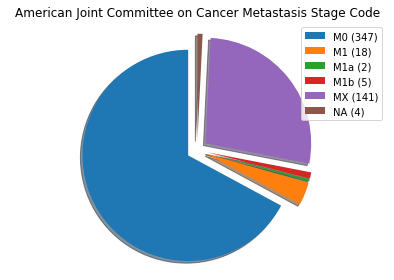

In [148]:
values_metastasis=meta_patients.astype(str).groupby("American Joint Committee on Cancer Metastasis Stage Code").size()
# nas = meta_patients.loc[:,"American Joint Committee on Cancer Metastasis Stage Code"].isnull().sum()
# values_metastasis.append(nas)
print(values_metastasis)
patches, text= plt.pie(values_metastasis,
        shadow=True, startangle=90, explode = (0.1,0.1,0.1,0.1,0.1,0.1))
labels= ["M0 (347)","M1 (18)","M1a (2)","M1b (5)", "MX (141)", "NA (4)"]
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('American Joint Committee on Cancer Metastasis Stage Code')
plt.tight_layout()
plt.show()

American Joint Committee on Cancer Metastasis Stage Code
M0     347
M1      18
M1a      2
M1b      5
MX     141
nan      4
dtype: int64


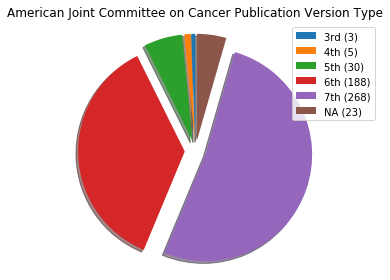

In [152]:
print(meta_patients.astype(str).groupby("American Joint Committee on Cancer Metastasis Stage Code").size())
values_ajcc_staging=meta_patients.astype(str).groupby("American Joint Committee on Cancer Publication Version Type").size()
fracs = [3,5,30,188,268,23]
total = sum(fracs)
patches, text= plt.pie(values_ajcc_staging, shadow=True, startangle=90, explode=(0.1,0.1,0.1,0.1,0.1,0.1,))
labels= ["3rd (3)","4th (5)","5th (30)","6th (188)", "7th (268)", "NA (23)"]
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('American Joint Committee on Cancer Publication Version Type')
plt.tight_layout()
plt.show()

In [154]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
meta_patients.dtypes

Patient ID                                                                                      object
Diagnosis Age                                                                                  float64
American Joint Committee on Cancer Metastasis Stage Code                                        object
Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code                       object
Neoplasm Disease Stage American Joint Committee on Cancer Code.1                                object
American Joint Committee on Cancer Publication Version Type                                     object
American Joint Committee on Cancer Tumor Stage Code                                             object
ALK Analysis Type                                                                               object
ALK Translocation Status                                                                        object
Cancer Type                                                              

In [209]:
df = meta_patients.groupby('Diagnosis Age').size()
bins = pd.cut(meta_patients.loc[:,'Diagnosis Age'], np.arange(35,91,5))
df=meta_patients.groupby(bins)['Diagnosis Age'].agg(['count'])


nas = meta_patients.loc[:,'Diagnosis Age'].isnull().sum()
# df.append({"Diagnosis Age" : "NA" , "count" : nas},ignore_index=True)
[str(c) for c in df.index]
df.tolist

# plt.bar([str(c) for c in df.index] , df.loc,color='g')
# plt.xticks(df.index)
# plt.show()

IndexError: single positional indexer is out-of-bounds

In [98]:
data_scaled.isnull().sum().sum()

0

In [99]:
#the followig code verifies whether there is repeated patients identifiers or not
patients_list = data_scaled.columns.tolist()
res = []
seen = []
for patient in patients_list:
    if patient in seen:
        res.append(patient)
    else:
        seen.append(patient)
print(res)




[]


In [113]:
print(meta_patients.shape)

(517, 106)


In [123]:
sel_index=meta_patients.apply(lambda x: (x.isnull()).all(), axis = 0)
labels_with_data = sel_index[sel_index==False].index.tolist()
print(len(labels_with_data))

meta_patients = meta_patients.loc[:,labels_with_data]
print(meta_patients.shape)
print(data_scaled.shape)


80
(517, 80)
(20531, 517)


In [125]:
meta_patients

,Patient ID,Diagnosis Age,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,ALK Analysis Type,ALK Translocation Status,Cancer Type,...,Stopped Smoking Year,Specimen Second Longest Dimension,Adjuvant Postoperative Targeted Therapy Administered Indicator,Tissue Source Site,Patient Smoking History Category,Primary Therapy Outcome Success Type,Tumor Site,Person Neoplasm Status,Vial number,Patient's Vital Status
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,TCGA-05-4244,70.0,M1,N2,Stage IV,6th,T2,NaN,NaN,Non-Small Cell Lung Cancer,...,NaN,0.9,NaN,5,4.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4249-01,TCGA-05-4249,67.0,M0,N0,Stage IB,6th,T2,NaN,NaN,Non-Small Cell Lung Cancer,...,NaN,0.8,NaN,5,3.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4250-01,TCGA-05-4250,79.0,M0,N1,Stage IIIA,6th,T3,NaN,NaN,Non-Small Cell Lung Cancer,...,NaN,0.7,NaN,5,4.0,NaN,Lung,NaN,A,Dead
TCGA-05-4382-01,TCGA-05-4382,68.0,M0,N0,Stage IB,6th,T2,NaN,NaN,Non-Small Cell Lung Cancer,...,NaN,0.8,NaN,5,4.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4384-01,TCGA-05-4384,66.0,M0,N2,Stage IIIA,6th,T2,NaN,NaN,Non-Small Cell Lung Cancer,...,1987.0,0.8,NaN,5,3.0,NaN,Lung,NaN,A,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-NJ-A55O-01,TCGA-NJ-A55O,56.0,M0,N1,Stage IIA,7th,T1b,NaN,NO,Non-Small Cell Lung Cancer,...,2000.0,NaN,NO,NJ,4.0,Stable Disease,Lung,TUMOR FREE,A,Alive
TCGA-NJ-A55R-01,TCGA-NJ-A55R,67.0,MX,N0,Stage IA,7th,T1b,NaN,NO,Non-Small Cell Lung Cancer,...,1986.0,NaN,NO,NJ,3.0,Stable Disease,Lung,TUMOR FREE,A,Alive
TCGA-NJ-A7XG-01,TCGA-NJ-A7XG,49.0,M0,N1,Stage IIIA,7th,T4,NaN,NaN,Non-Small Cell Lung Cancer,...,NaN,NaN,YES,NJ,3.0,Stable Disease,Lung,WITH TUMOR,A,Alive


In [135]:
quantity_na = meta_patients.apply(lambda x: (x.isnull()).sum(), axis = 0)
print(str(quantity_na[quantity_na!=0].index.size) + " labels with more than one NA")
print(str(quantity_na[quantity_na!=0].sum()) + " NAs")


59 labels with more than one NA
12072 NAs


In [128]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

print(meta_patients.columns.tolist())

print(meta_patients.groupby("Patient's Vital Status").size())


# ind=subset_meta_patients.groupby('VITAL_STATUS').size().index
# values = subset_meta_patients.groupby('VITAL_STATUS').size().tolist()
# plt.bar(ind, values,color=('c','k'))
# plt.xticks(ind)
# plt.show()


# data_control = data_scale[meta["Muscle.loss"]=="control"]
# data_control.iloc[:,[13,17,19]].plot.bar()

['Patient ID', 'Diagnosis Age', 'American Joint Committee on Cancer Metastasis Stage Code', 'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code', 'Neoplasm Disease Stage American Joint Committee on Cancer Code.1', 'American Joint Committee on Cancer Publication Version Type', 'American Joint Committee on Cancer Tumor Stage Code', 'ALK Analysis Type', 'ALK Translocation Status', 'Cancer Type', 'Cancer Type Detailed', 'Carbon monoxide diffusion dlco', 'Days to Sample Collection.', 'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value', 'Disease Free (Months)', 'Disease Free Status', 'Disease code', 'Performance Status', 'Ethnicity Category', 'Fev1 fvc ratio postbroncholiator', 'Fev1 fvc ratio prebroncholiator', 'Fev1 percent ref postbroncholiator', 'Fev1 percent ref prebroncholiator', 'Form completion date', 'Fraction Genome Altered', 'Neoplasm Histologic Type Name', 'Neoadjuvant Therapy Type Administered Prior To Resection Text', 'Prior Cancer Di

In [142]:
print(meta_patients.groupby('Stopped Smoking Year').size())
print()
print(meta_patients.groupby('Patient\'s Vital Status').size())
print()
print(meta_patients.groupby('Diagnosis Age').size())
print(meta_patients.loc[:,'Diagnosis Age'].isnull().sum())

Stopped Smoking Year
1948.0     1
1955.0     1
1961.0     1
1962.0     1
1964.0     1
1965.0     2
1967.0     3
1968.0     2
1971.0     1
1972.0     4
1973.0     1
1974.0     2
1975.0     5
1976.0     5
1977.0     1
1978.0     1
1979.0     2
1980.0     5
1981.0     6
1982.0     6
1983.0     6
1984.0     6
1985.0    12
1986.0     7
1987.0     4
1988.0     4
1989.0     3
1990.0     4
1991.0     5
1992.0     1
1993.0     7
1994.0     6
1995.0     6
1996.0     5
1997.0     3
1998.0     6
1999.0     8
2000.0     3
2001.0     5
2002.0     7
2003.0     5
2004.0    10
2005.0     7
2006.0    11
2007.0    11
2008.0     7
2009.0    10
2010.0     9
2011.0    16
2012.0    14
2013.0     1
dtype: int64

Patient's Vital Status
Alive    330
Dead     187
dtype: int64

Diagnosis Age
38.0     1
39.0     1
40.0     2
41.0     4
42.0     5
43.0     1
44.0     1
45.0     4
46.0     2
47.0     3
48.0     3
49.0     5
50.0     5
51.0     8
52.0    11
53.0     6
54.0     9
55.0     8
56.0    12
57.0    10
58.0 

In [133]:
data_scaled = data_scaled.transpose()

0


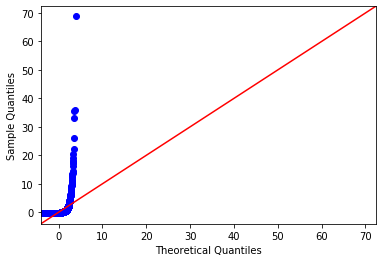

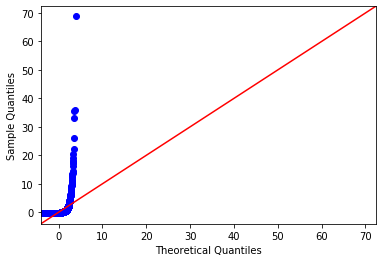

In [134]:
from scipy import stats
p_values=[]
for sample in data_scaled.index.tolist():
    w, p_value = stats.shapiro(np.random.choice(data_scaled.loc[sample],500))
    p_values.append(p_value)

counter = 0
for p_value in p_values:
    if p_value>=0.05:
        counter+=1

print(counter)

test = data_scaled.iloc[0]
sm.qqplot(test,line='45')



In [16]:
data_scaled


Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,7789,158586,79364,440590,79699,7791,23140,26009,387590,389932
TCGA-05-4244-01,-0.237976,-0.235534,-0.235224,-0.225879,-0.030925,-0.237976,-0.153776,-0.237720,-0.237976,-0.237976,...,-0.228270,-0.166632,-0.004022,-0.237806,0.027393,0.454179,-0.025477,-0.097672,-0.236358,-0.237976
TCGA-05-4249-01,-0.284208,-0.281997,-0.280385,-0.256397,-0.000292,-0.284208,-0.239593,-0.283713,-0.284208,-0.284208,...,-0.265116,-0.132556,0.078155,-0.277976,-0.042237,0.438243,0.065493,-0.072112,-0.228909,-0.284208
TCGA-05-4250-01,-0.262620,-0.260657,-0.260989,-0.249197,0.046482,-0.262620,-0.248603,-0.262620,-0.262620,-0.262620,...,-0.246357,-0.163600,-0.033938,-0.255432,-0.133857,1.210829,0.054569,-0.118223,-0.260913,-0.262620
TCGA-05-4382-01,-0.237402,-0.234666,-0.235573,-0.217408,-0.042566,-0.237402,-0.179465,-0.237286,-0.237344,-0.237402,...,-0.227640,-0.153703,-0.008890,-0.221748,-0.018190,1.396779,0.044830,-0.077166,-0.228910,-0.237402
TCGA-05-4384-01,-0.216851,-0.216084,-0.216020,-0.199591,-0.083119,-0.216851,-0.151584,-0.216706,-0.216851,-0.216851,...,-0.197809,-0.082828,0.097419,-0.214961,-0.031516,0.578273,0.196555,-0.044744,-0.126873,-0.216851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-NJ-A55O-01,-0.181073,-0.178148,-0.176740,-0.162191,-0.016355,-0.181073,-0.132801,-0.180853,-0.181073,-0.181073,...,-0.173376,-0.119056,0.027629,-0.177774,-0.044174,0.607770,0.070293,-0.070784,-0.080021,-0.181073
TCGA-NJ-A55R-01,-0.268213,-0.265791,-0.265243,-0.246717,-0.047634,-0.268213,-0.161691,-0.268006,-0.268213,-0.268213,...,-0.253627,-0.160516,0.159119,-0.253074,-0.050192,0.617213,0.304075,-0.092220,-0.050330,-0.267867
TCGA-NJ-A7XG-01,-0.113118,-0.108331,-0.104085,-0.103611,-0.037644,-0.113118,-0.075840,-0.113118,-0.113118,-0.113118,...,-0.111231,-0.094300,0.023295,-0.111996,-0.053912,0.109069,0.045478,-0.065590,-0.112506,-0.113118
TCGA-O1-A52J-01,-0.154371,-0.152194,-0.150632,-0.144922,0.021401,-0.154371,-0.127972,-0.153927,-0.154371,-0.154371,...,-0.133296,-0.067409,0.046026,-0.154297,-0.033467,0.538514,0.080633,-0.080498,-0.125606,-0.154297


In [79]:

patients = data_scaled.index.tolist()
mydata = data_scaled.copy()
mydata.insert(len(mydata.columns),"VITAL_STATUS",subset_meta_patients.loc[:,"VITAL_STATUS"])
interest_vital_status = []
for ids in mydata.columns.tolist()[:-1]:
    l_data = {grp: mydata[ids][mydata.loc[:,"VITAL_STATUS"] == grp] for grp in ['Dead', 'Alive']}
    f, p = stats.kruskal(l_data['Dead'],l_data['Alive'])
    if p<0.05:
        interest_vital_status.append(ids)

len(interest_vital_status)

12926

In [80]:
import statsmodels.stats.multicomp as multi
x = pd.Series(mydata[interest_vital_status[1]].values, dtype=float) 
y = mydata["VITAL_STATUS"]
mcDate = multi.MultiComparison(x,y)
Results = mcDate.tukeyhsd()
print(Results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Alive   Dead  -0.0113 0.0228 -0.0209 -0.0016   True
----------------------------------------------------


In [37]:
len(interest_vital_status2)

11145